In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
data = pd.read_csv('/content/titanic.csv')

<ipython-input-23-06715e559907>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


Model Accuracy: 0.75


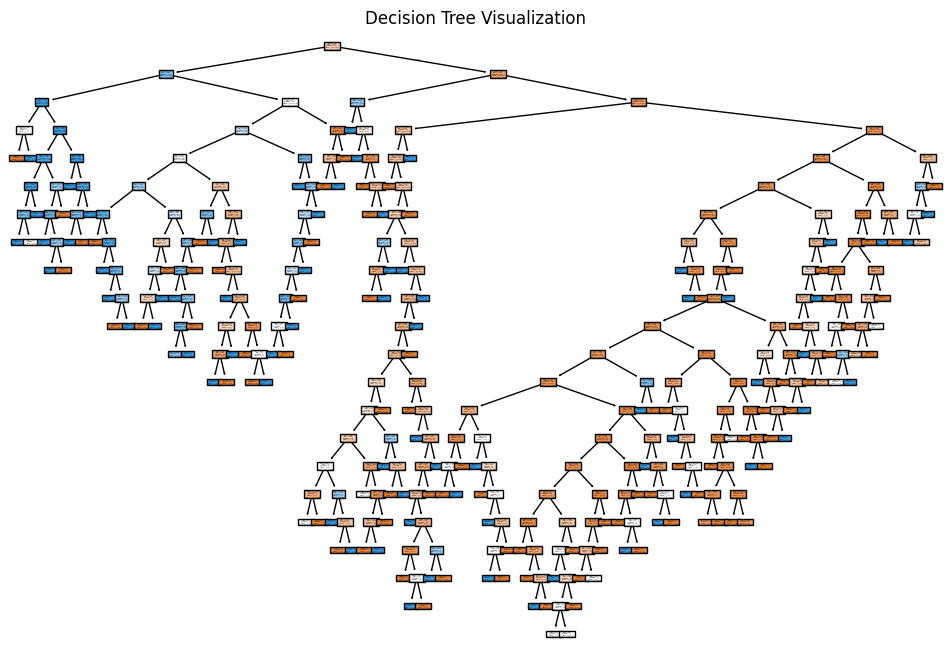

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Select relevant columns
columns = ['Pclass', 'Sex', 'Age', 'Fare', 'Survived']
data = data[columns]

# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

# Encode categorical variable 'Sex'
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Define features (X) and target (y)
X = data[['Pclass', 'Sex', 'Age', 'Fare']]
y = data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=['Pclass', 'Sex', 'Age', 'Fare'], class_names=['Not Survived', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [27]:
from sklearn.preprocessing import LabelEncoder

# Example LabelEncoder initialization and fitting
label_encoder = LabelEncoder()
label_encoder.fit(["male", "female"])

def predict_survival():
    print("\nEnter passenger details:")
    try:
        pclass = int(input("Pclass (1, 2, 3): "))
        sex = input("Sex (male, female): ").lower()
        age = float(input("Age: "))
        fare = float(input("Fare: "))

        # Encode the input sex
        sex_encoded = label_encoder.transform([sex])[0]

        # Prepare the input data
        input_data = [[pclass, sex_encoded, age, fare]]

        # Predict survival
        prediction = model.predict(input_data)
        prediction_prob = model.predict_proba(input_data)

        if prediction[0] == 1:
            print(f"The passenger is predicted to survive with a probability of {prediction_prob[0][1]:.2f}.")
        else:
            print(f"The passenger is predicted not to survive with a probability of {prediction_prob[0][0]:.2f}.")
    except ValueError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Unexpected error: {e}")

# Call the prediction function
predict_survival()



Enter passenger details:
Pclass (1, 2, 3): 1
Sex (male, female): female
Age: 38
Fare: 71.2833
The passenger is predicted to survive with a probability of 1.00.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
